### 划分数据

In [1]:
import os, shutil

In [2]:
# 原始数据集解压路径
original_dataset_dir = 'data/cats_and_dogs'

# 保存较小数据集的目录
base_dir = 'data/cats_and_dogs_small'
os.mkdir(base_dir)

# 划分后的训练、验证、测试集目录
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 训练集猫、狗目录
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 验证集猫、狗目录
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 测试集猫、狗目录
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 拷贝 1000 张猫的图像到 train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 拷贝 500 张猫的图像到 validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 拷贝 500 张猫的图像到 test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 拷贝 1000 张狗的图像到 train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 拷贝 500 张狗的图像到 validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 拷贝 500 张狗的图像到 test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('Total test cat images:', len(os.listdir(test_cats_dir)))
print('Total test dog images:', len(os.listdir(test_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total test cat images: 500
Total test dog images: 500


### 构建模型

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### 数据预处理

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# 将所有图像乘以 1/255 缩放
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 读取训练图像生成器
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=20, 
    class_mode='binary')

# 读取验证图像生成器
validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### 训练与验证

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30, 
    validation_data=validation_generator, 
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 11s 107ms/step - loss: 0.6910 - acc: 0.5285 - val_loss: 0.6690 - val_acc: 0.6030
Epoch 2/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6581 - acc: 0.5985 - val_loss: 0.6352 - val_acc: 0.6420
Epoch 3/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6247 - acc: 0.6580 - val_loss: 0.6123 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5753 - acc: 0.6955 - val_loss: 0.6106 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5450 - acc: 0.7195 - val_loss: 0.5851 - val_acc: 0.6910
Epoch 6/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5134 - acc: 0.7405 - val_loss: 0.5918 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 7s 71ms/step - loss: 0.4798 - acc: 0.7695 - val_loss: 0.5720 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 7s 71ms/step 

In [9]:
model.save('cats_and_dogs_small_1.h5')

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

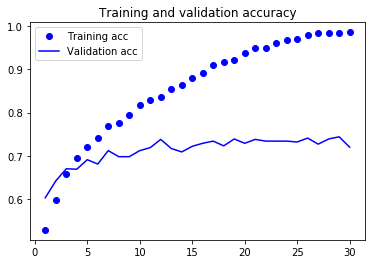

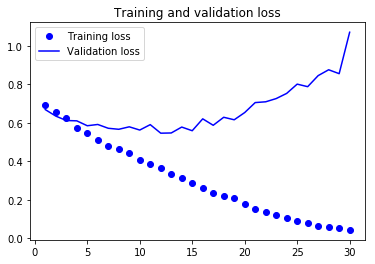

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 使用数据增强

In [12]:
datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest')

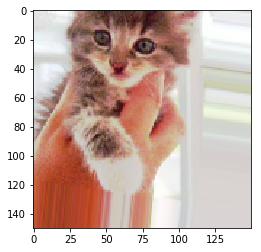

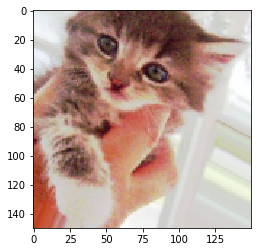

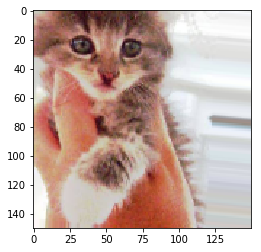

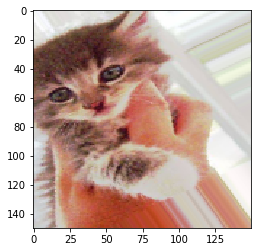

In [13]:
# 图像预处理模块
from keras.preprocessing import image      

# 选择一张图像进行增强
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

# 形状变为 (1, 150, 150, 3) 的 Numpy 数组
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    implot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
    
plt.show()

### 添加Dropout

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### 训练与验证

In [18]:
# 训练数据使用增强
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 验证数据不能使用增强
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,
    epochs=100, 
    validation_data=validation_generator, 
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 26s 264ms/step - loss: 0.6937 - acc: 0.5163 - val_loss: 0.6838 - val_acc: 0.5228
Epoch 2/100
100/100 [==============================] - 24s 243ms/step - loss: 0.6792 - acc: 0.5719 - val_loss: 0.6540 - val_acc: 0.6031
Epoch 3/100
100/100 [==============================] - 24s 244ms/step - loss: 0.6655 - acc: 0.5953 - val_loss: 0.6629 - val_acc: 0.5838
Epoch 4/100
100/100 [==============================] - 25s 246ms/step - loss: 0.6537 - acc: 0.6134 - val_loss: 0.6464 - val_acc: 0.6211
Epoch 5/100
100/100 [==============================] - 25s 248ms/step - loss: 0.6343 - acc: 0.6334 - val_loss: 0.6331 - val_acc: 0.6237
Epoch 6/100
100/100 [==============================] - 24s 244ms/step - loss: 0.6104 - acc: 0.6619 - val_loss: 0.6021 - val_acc: 0.6682
Epoch 7/100
100/100 [==============================] - 25s 245ms/step - loss: 0.6035 - acc: 0.6666 - val_loss: 0.6004 - val_acc: 0.6599
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 24s 238ms/step - loss: 0.4219 - acc: 0.8094 - val_loss: 0.5205 - val_acc: 0.7713
Epoch 62/100
100/100 [==============================] - 24s 238ms/step - loss: 0.4204 - acc: 0.8013 - val_loss: 0.4445 - val_acc: 0.7906
Epoch 63/100
100/100 [==============================] - 24s 236ms/step - loss: 0.4011 - acc: 0.8178 - val_loss: 0.4197 - val_acc: 0.8073
Epoch 64/100
100/100 [==============================] - 24s 239ms/step - loss: 0.3981 - acc: 0.8178 - val_loss: 0.4327 - val_acc: 0.8086
Epoch 65/100
100/100 [==============================] - 25s 250ms/step - loss: 0.4002 - acc: 0.8228 - val_loss: 0.4564 - val_acc: 0.7963
Epoch 66/100
100/100 [==============================] - 24s 242ms/step - loss: 0.4041 - acc: 0.8163 - val_loss: 0.5097 - val_acc: 0.7668
Epoch 67/100
100/100 [==============================] - 24s 235ms/step - loss: 0.3939 - acc: 0.8166 - val_loss: 0.4290 - val_acc: 0.8090
Epoch 68/100
100/100 [===================

In [20]:
model.save('cats_and_dogs_small_2.h5')

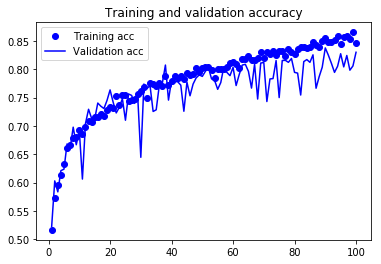

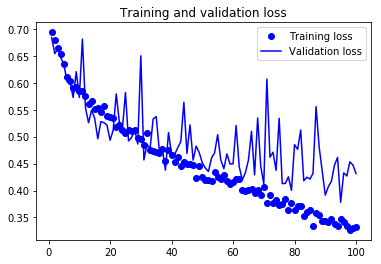

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()